# computing

In [2]:
from heatMD_util import *
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
# omp_num_threads = 8

In [ ]:
traj_path = '/mnt/zhangpeng/100_nitrogen_MD/03_20230531_VHH_heatingMD_Tm'
def traj2csv(traj_p,case):
    rep_path = os.path.join(traj_p,case)
    trajs = sorted([i for i in os.listdir(rep_path) if 'VHH' in i])
    print(trajs)
    df_Q = pd.DataFrame()
    # df_hydrophobicSASA = pd.DataFrame()
    for i in trajs:
        if os.path.exists(os.path.join(rep_path,i,'traj_0.pdb')):
            pdb = os.path.join(rep_path,i,'traj_0.pdb')
            dcd = os.path.join(rep_path,i,'traj.dcd')
            t = md.load(dcd,top=pdb)[0:900]
            print(i+'load done\n')
            print(t)
            print('cal Q')
            df_Q[i]=best_hummer_q_hydrophilic_All(t,t[0])
            print('Q done')
            print('cal SASA')
            # df_hydrophobicSASA[i] = get_hydrophobic_SASA(t)

    df_Q.to_csv('Q_'+case+'.csv')
    # df_hydrophobicSASA.to_csv('hydrophobic_SASA_'+case+'.csv')

cases = sorted([i for i in os.listdir(traj_path) if 'rep' in i])
print(cases)
# for j in cases:
#     print(j)
#     traj2csv(traj_path,j)
Parallel(n_jobs=10)(delayed(traj2csv)(traj_path,i) for i in cases)

# ploting

      VHH-1     VHH-2     VHH-3     VHH-4     VHH-5     VHH-6     VHH-7  \
0  0.752733  0.793350  0.706373  0.741646  0.800122  0.795834  0.742879   
0  0.805523  0.756341  0.827634  0.713336  0.793100  0.824443  0.761123   
0  0.752017  0.706871  0.741943  0.737803  0.808364  0.705592  0.809101   
0       NaN  0.775114  0.818460  0.778921  0.816521       NaN  0.714590   
0  0.853083  0.786654  0.729200  0.770508  0.778093  0.669333  0.745539   
0  0.852406  0.775846  0.809928       NaN  0.754683  0.795149  0.660635   
0  0.789391  0.768873  0.845828  0.736012  0.757717  0.734368  0.663656   
0  0.718784  0.819426       NaN  0.670008  0.724070  0.783876  0.814521   
0  0.858208  0.809903  0.757845  0.783867  0.755170  0.793767  0.613264   
0  0.783272  0.791555  0.757921  0.707738  0.757365  0.772523  0.761488   

      VHH-8  
0  0.804728  
0  0.854188  
0  0.820660  
0  0.792824  
0       NaN  
0  0.820865  
0  0.826105  
0  0.805347  
0  0.791485  
0  0.876317  


Text(0, 0.5, 'Q_hydrophilic_All_avg')

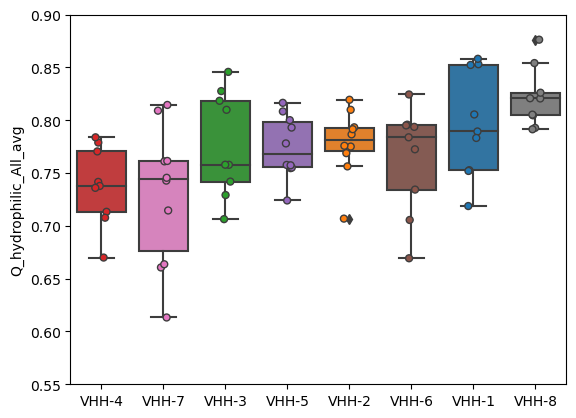

In [3]:
def get_mean(csv_f):
    df=pd.read_csv(csv_f)
    return df.iloc[:,1:].mean().to_frame().T
Q_l = sorted([ i for i in os.listdir('./') if 'Q_rep' in i])
df_Q_l = [get_mean(i) for i in Q_l]
new_df_Q = pd.concat(df_Q_l)
print(new_df_Q)
new_df_Q.median().to_csv('../hmd_q_polar_all_median.csv')
meds = new_df_Q.median().sort_values()
new_df_Q = new_df_Q[meds.index]
# new_df_Q.boxplot()
columns_names=['VHH-'+str(i) for i in range(1,9)]
color_names=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
c_map=dict(zip(columns_names,color_names))
ax = sns.boxplot(data=new_df_Q,palette=c_map)
sns.stripplot(data=new_df_Q, ax=ax, linewidth=1,palette=c_map)
plt.ylim(0.55,0.9)
plt.ylabel('Q_hydrophilic_All_avg')

In [5]:
Q_median = new_df_Q.median(axis=0).sort_values(ascending=False).to_frame().T
print(Q_median)
print('>'.join( Q_median.columns))

     VHH-8     VHH-1     VHH-6    VHH-2     VHH-5     VHH-3     VHH-7  \
0  0.82066  0.789391  0.783876  0.78125  0.767905  0.757921  0.744209   

      VHH-4  
0  0.737803  
VHH-8>VHH-1>VHH-6>VHH-2>VHH-5>VHH-3>VHH-7>VHH-4


In [5]:
print(sns.color_palette().as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
